In [20]:
import os, inspect, sys
import numpy as np
#currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = '/home/trxw/Documents/ML/rl-quantum-gates/ml-q-channel-all/modular/cp/trappedionsqsim/'
sys.path.insert(0,parentdir) 
from trappedionsqsim.utils.simulations import Simulation as simulation
import matplotlib.pyplot as plt


In [22]:
#Initialize Simulation instance 
t1, t2 = 0.,10.

N = 1000
t_arr = np.linspace(t1, t2, N)
sim = simulation(1, 2, 1, 10)
psi0 = sim.ket([0],[7])
sim.set_state(psi0)

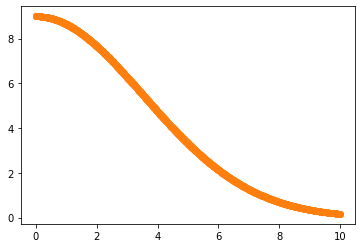

In [25]:
#With splines

func = lambda t: 9*np.exp(-(t / 5)** 2)
func2 = lambda t: 10*np.exp(-(t / 5)** 2)

noise_amp = 0.0
noisy_func = lambda t: func(t)+(noise_amp*func(t))*np.random.randn(t.shape[0])
noisy_func2 = lambda t: func2(t)+(noise_amp*func2(t))*np.random.randn(t.shape[0])

noisy_data = noisy_func(t_arr)
noisy_data2 = noisy_func2(t_arr)

plt.plot(t_arr, func(t_arr))
plt.plot(t_arr, noisy_data, 'o')
plt.show()

In [26]:
#With defined function

a  = sim.a(1)
sm = sim.sm(1)
c_ops = []
H0 = 2 * np.pi * a.dag() * a + 2 * np.pi * sm.dag() * sm + 2 * np.pi * 0.25 * (sm * a.dag() + sm.dag() * a)   
H1 = sim.sx(1)

H = [[H0, '1.'], [H1, '9 * exp(-(t / 5) ** 2)'] ]#, [H1, '10 * exp(-(t / 5) ** 2)']]
output = sim.evolve_spline(H, t_arr, c_ops, [a.dag() * a])


No c_ops, using sesolve
10.0%. Run time:   0.02s. Est. time left: 00:00:00:00
20.0%. Run time:   0.04s. Est. time left: 00:00:00:00
30.0%. Run time:   0.07s. Est. time left: 00:00:00:00
40.0%. Run time:   0.09s. Est. time left: 00:00:00:00
50.0%. Run time:   0.11s. Est. time left: 00:00:00:00
60.0%. Run time:   0.14s. Est. time left: 00:00:00:00
70.0%. Run time:   0.16s. Est. time left: 00:00:00:00
80.0%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.22s


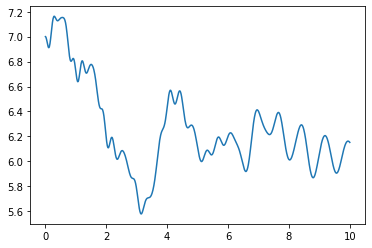

In [27]:
plt.plot(t_arr, output.expect[0])
plt.show()

In [28]:
#Test Simulation with Cubic Spline:
import qutip as qtp
N = 1000
t1, t2 = 0.,10.
t_arr = np.linspace(t1, t2, N)
func = lambda t: 9*np.exp(-(t / 5)** 2)
func_data = func(t_arr)

S = qtp.interpolate.Cubic_Spline(t_arr[0], t_arr[-1], func_data)


sim = simulation(1, 2, 1, 10)
psi0 = sim.ket([0],[7])
sim.set_state(psi0)
a  = sim.a(1)
sm = sim.sm(1)
c_ops = []
H0 = 2 * np.pi * a.dag() * a + 2 * np.pi * sm.dag() * sm + 2 * np.pi * 0.25 * (sm * a.dag() + sm.dag() * a)   
H1 = sim.sx(1)

H = [[H0, '1.'], [H1, S] ]#, [H1, '10 * exp(-(t / 5) ** 2)']]
output = sim.evolve_spline(H, t_arr, c_ops, [a.dag() * a])


No c_ops, using sesolve
10.0%. Run time:   0.02s. Est. time left: 00:00:00:00
20.0%. Run time:   0.04s. Est. time left: 00:00:00:00
30.0%. Run time:   0.07s. Est. time left: 00:00:00:00
40.0%. Run time:   0.09s. Est. time left: 00:00:00:00
50.0%. Run time:   0.11s. Est. time left: 00:00:00:00
60.0%. Run time:   0.13s. Est. time left: 00:00:00:00
70.0%. Run time:   0.15s. Est. time left: 00:00:00:00
80.0%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.22s


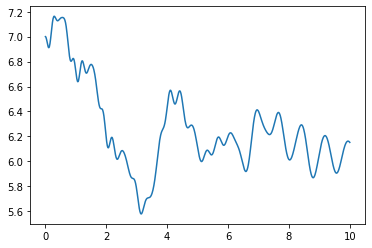

In [29]:
plt.plot(t_arr, output.expect[0])
plt.show()

In [30]:
pwd

'/home/trxw/Documents/ML/rl-quantum-gates/ml-q-channel-all/modular/cp/trappedionsqsim/test'